# Exploratory Data Analysis


#### Initial Setups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir("..")

In [2]:
# matplotlib style
plt.style.use('ggplot')

# use latex font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


### Read Data

In [8]:
data = pd.read_csv("data/coffee_data.csv")
data.rename({"Unnamed: 0": "TOD"}, axis=1, inplace=True)  # rename the first column to "time of day"

# convert the time of day to a float
data["TOD"] = pd.to_datetime(data["TOD"], format="%I:%M %p").dt.time
data["TOD"] = data["TOD"].apply(lambda x: x.hour + x.minute / 60.0) # as float

# remove time since roasted greater than 100
data = data[data["Time since roasted (days)"] <= 100]

In [12]:
data

,TOD,Coffee no. (of day),Weight,Bloom,hot water amount,Brew length (s),Amount hot water after,Time since roasted (days),Rating /10
13,9.166667,1,10,1,144,61,38,0.0,7
14,11.500000,2,12,1,140,51,35,0.0,8
15,9.000000,1,14,0,132,77,78,0.0,7
16,9.333333,1,12,1,160,64,0,0.0,8
17,12.333333,2,18,0,141,150,55,0.0,5
18,10.000000,1,12,1,183,90,0,0.0,4
19,13.250000,2,11,1,60,60,81,0.0,9
20,10.250000,1,14,0,85,84,90,0.0,8
21,13.500000,2,13,1,64,64,81,0.0,7
22,9.500000,1,12,1,109,90,60,0.0,7


## Initial Plots

<AxesSubplot:xlabel='TOD', ylabel='Rating /10'>

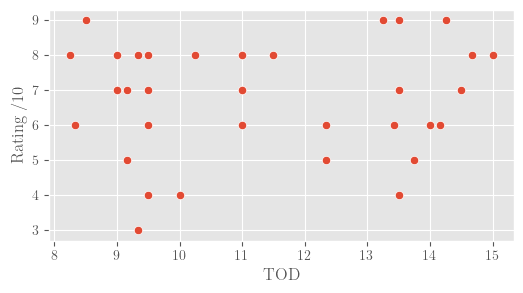

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.scatterplot(data=data, x="TOD", y="Rating /10", ax=ax)

/home/danny/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


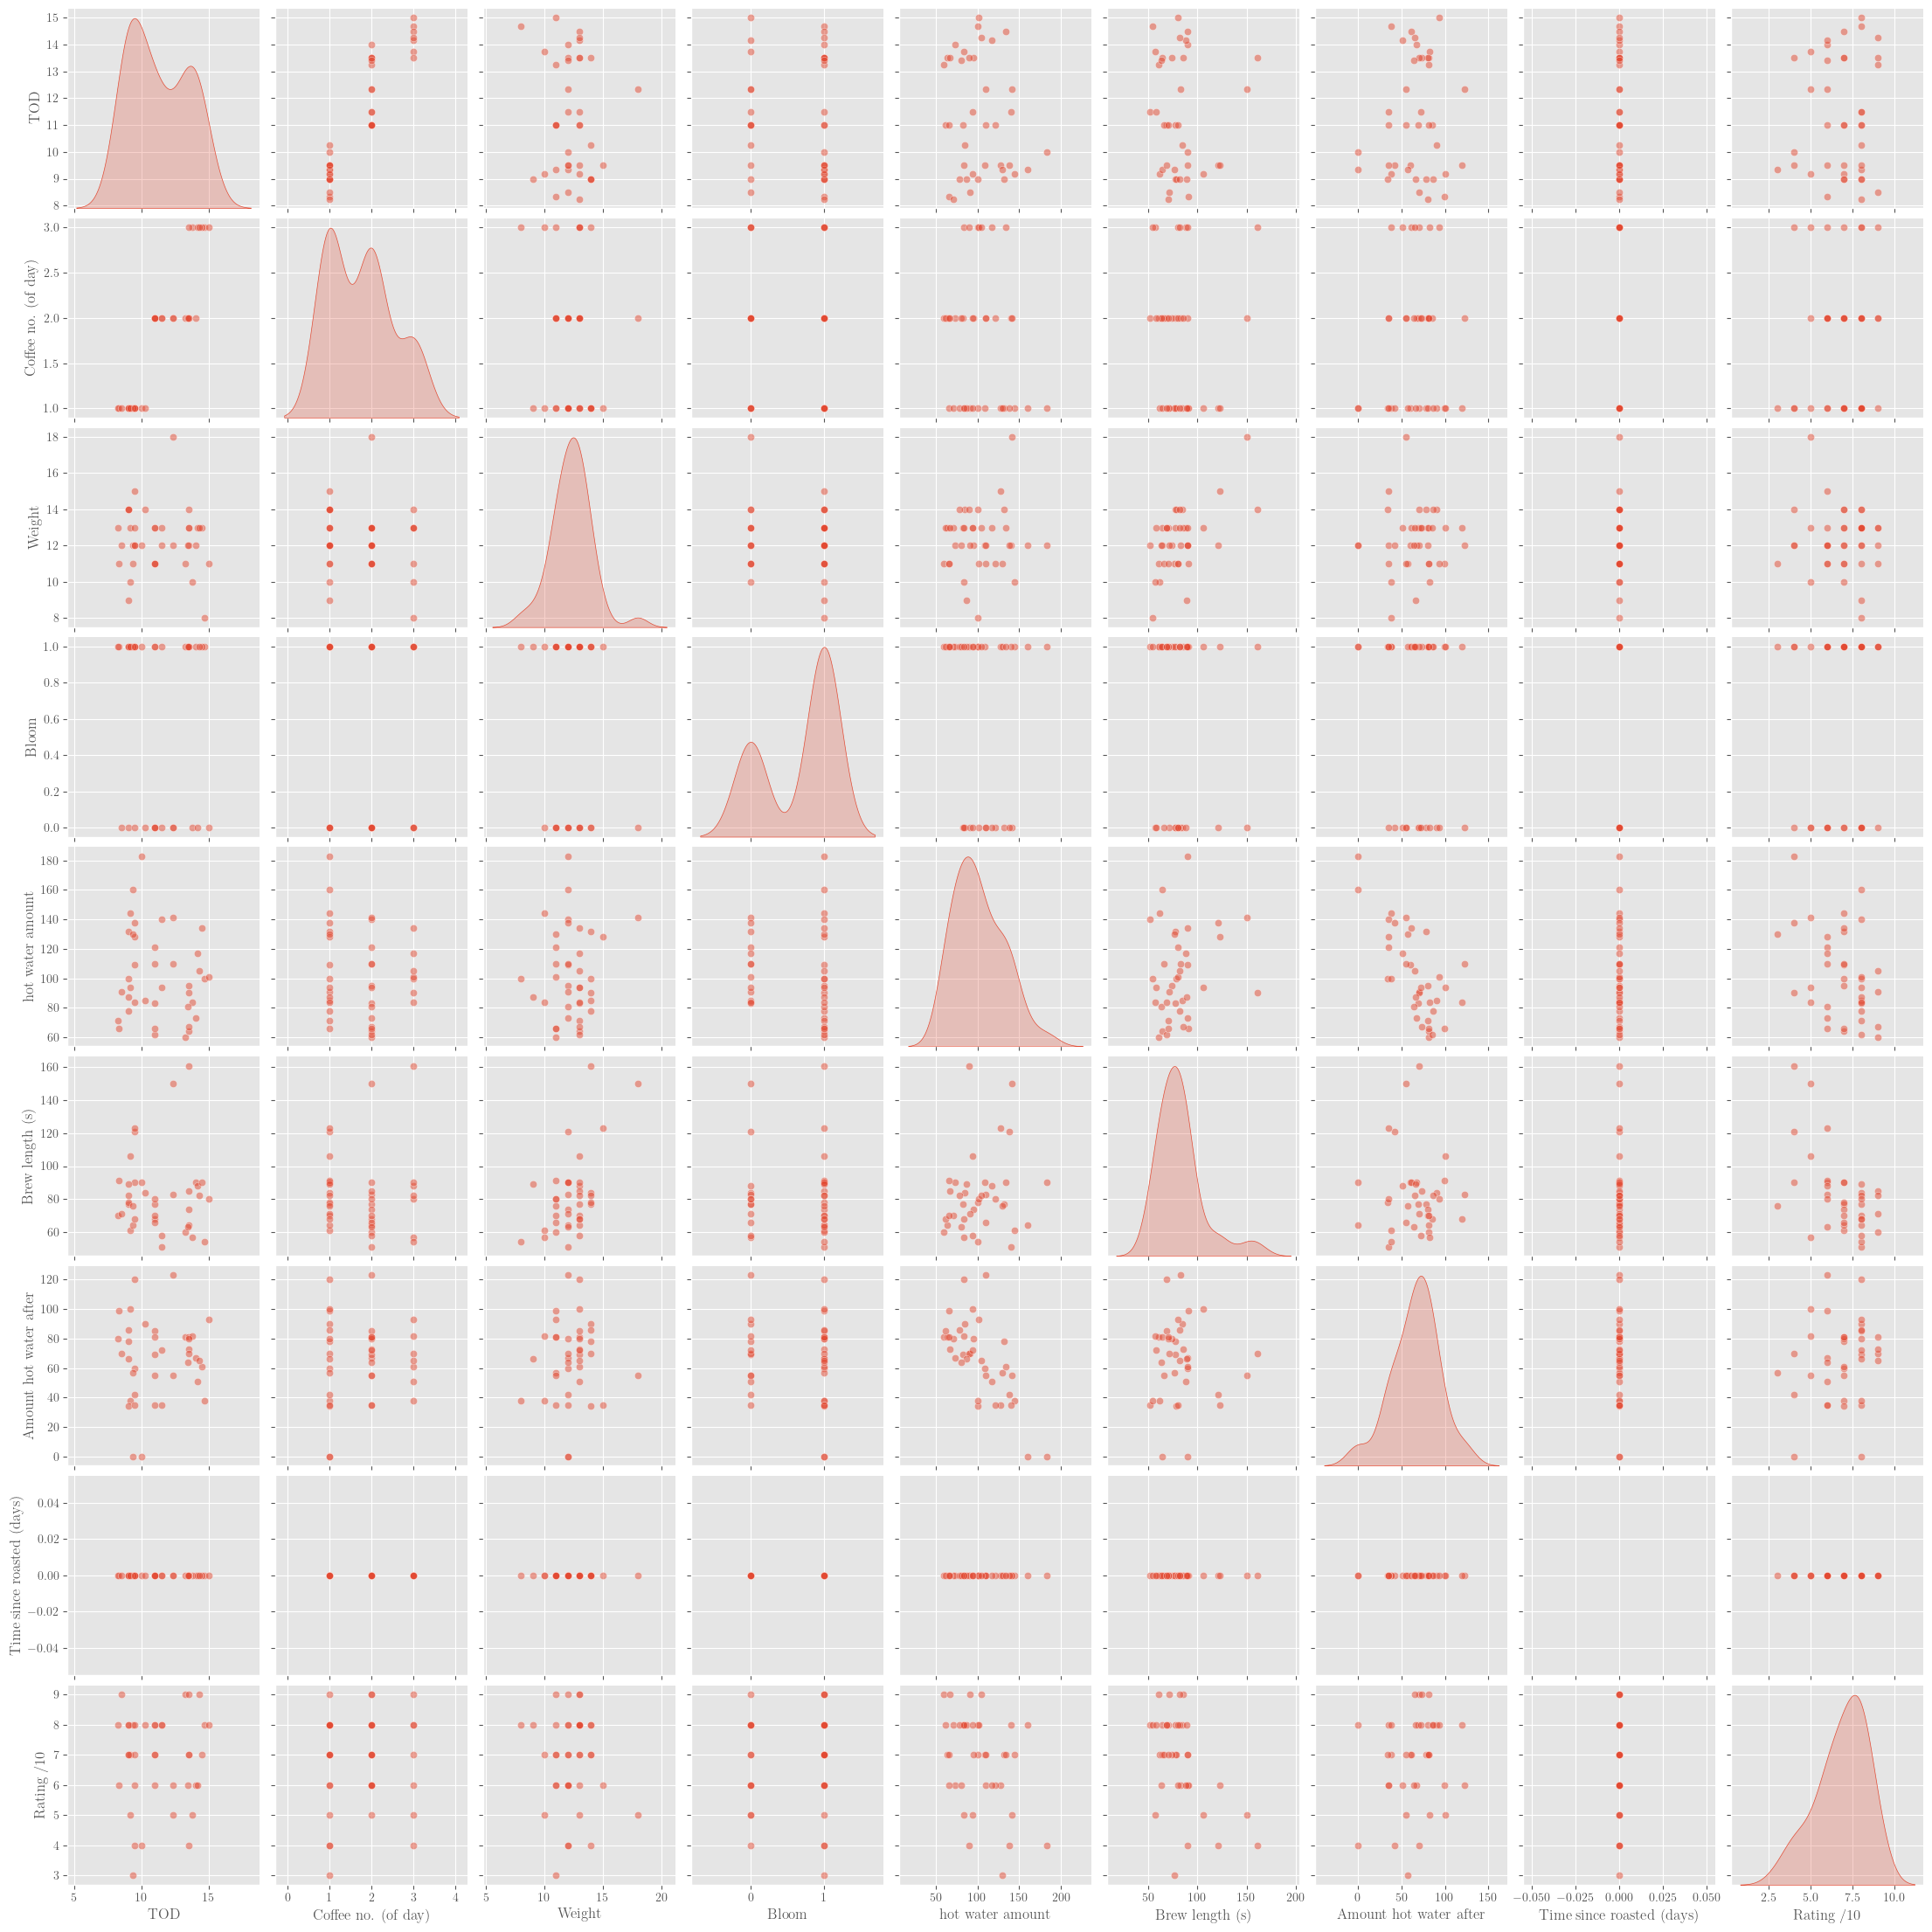

In [11]:
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.5})